## Normalization Global Min-Max

In [1]:
# DAL ToolBox
# version 1.1.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Series for studying

In [2]:
data(sin_data)

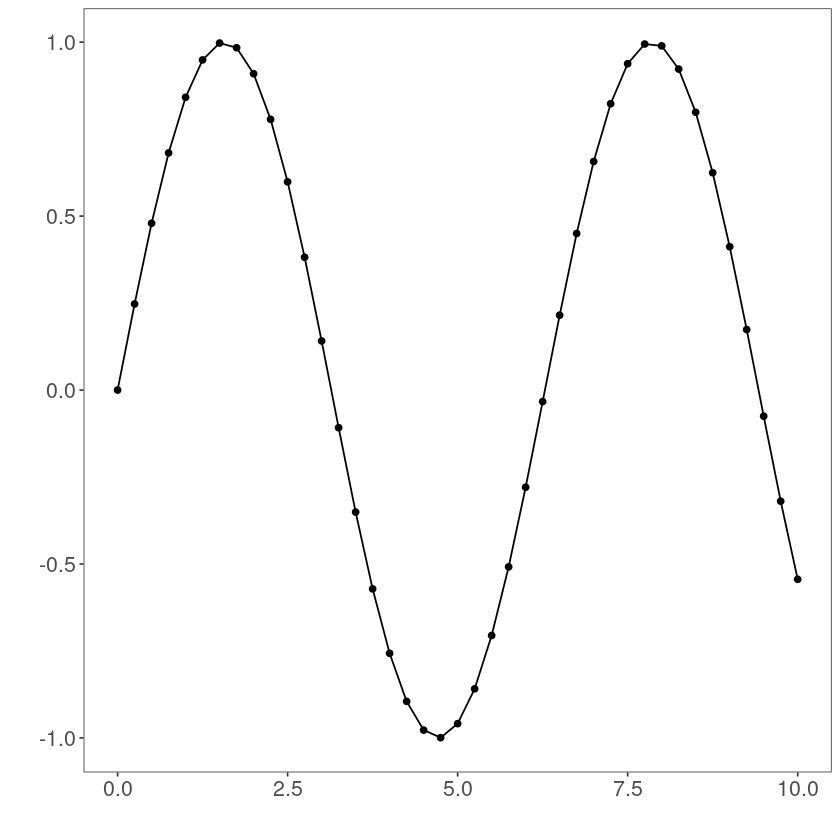

In [3]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### sliding windows

In [4]:
sw_size <- 10
ts <- ts_data(sin_data$y, sw_size)
ts_head(ts, 3)
summary(ts[,10])

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721,0.3816610


       t0          
 Min.   :-0.99929  
 1st Qu.:-0.55091  
 Median : 0.05397  
 Mean   : 0.02988  
 3rd Qu.: 0.63279  
 Max.   : 0.99460  

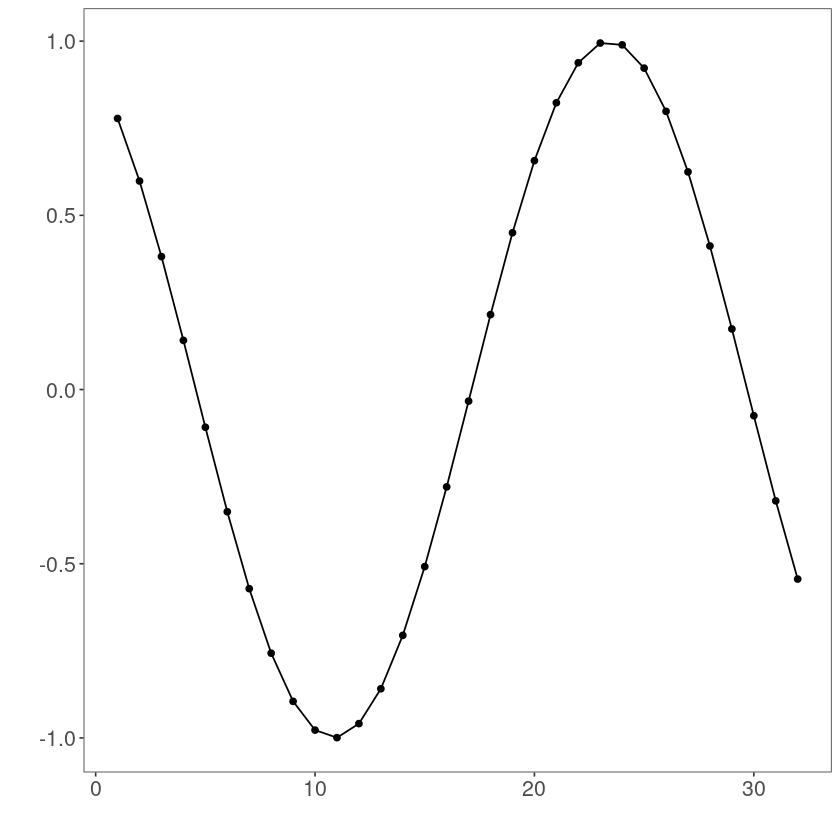

In [5]:
library(ggplot2)
plot_ts(y=ts[,10]) + theme(text = element_text(size=16))

### normalization

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.5004502,0.6243512,0.7405486,0.8418178,0.9218625,0.9757058,1.0000000,0.9932346,0.9558303,0.8901126
0.6243512,0.7405486,0.8418178,0.9218625,0.9757058,1.0000000,0.9932346,0.9558303,0.8901126,0.8001676
0.7405486,0.8418178,0.9218625,0.9757058,1.0000000,0.9932346,0.9558303,0.8901126,0.8001676,0.6915877


       t0        
 Min.   :0.0000  
 1st Qu.:0.2246  
 Median :0.5275  
 Mean   :0.5154  
 3rd Qu.:0.8174  
 Max.   :0.9985  

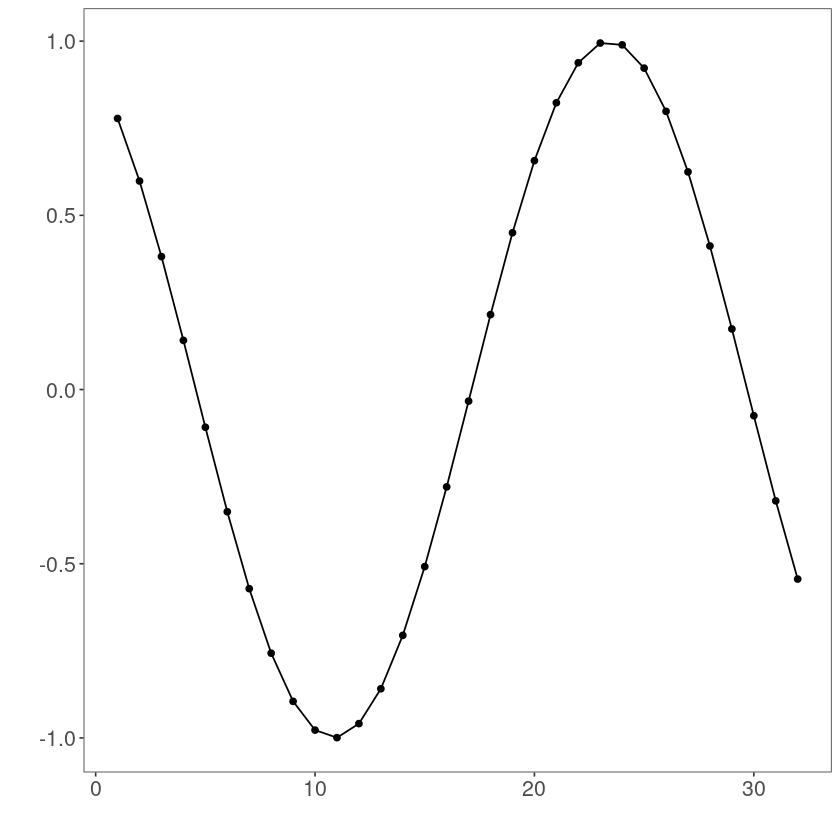

In [6]:
preproc <- ts_norm_gminmax()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
ts_head(tst, 3)
summary(tst[,10])
plot_ts(y=ts[,10]) + theme(text = element_text(size=16))